In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import random

from IPython.display import display, HTML

In [2]:
data = np.load("/home/robertoinfurna/Desktop/astrostatistics_bicocca_2024/solutions/formationchannels.npy")

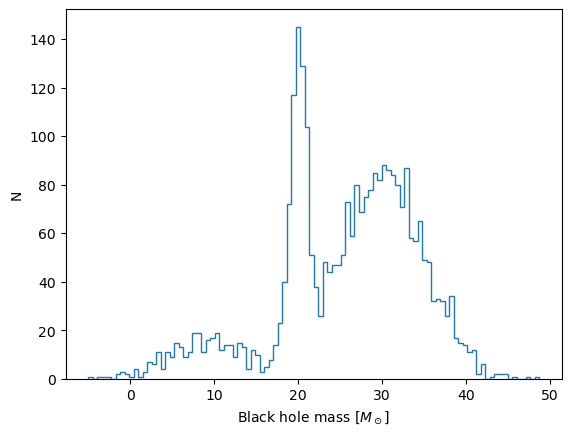

In [9]:
plt.hist(data,bins=100,histtype='step');
plt.xlabel("Black hole mass $[M_\odot]$")
plt.ylabel("N")
plt.show()

In [10]:
# fit gaussian mixtures models with 1 to 10 components
gauss_mixture_models = []
for N in range(1,11):
    gauss_mixture_models.append(GaussianMixture(N).fit(data))


### Which of the gaussian mixture models better describes the data? How many gaussians do we actually need?

Popular general-purpose tool for model comparison is the **Akaike Information Criterion** (AIC):

$$ \mathrm{AIC}_M \equiv -2\ln[L^0(M)] + 2k + \frac{2k(k+1)}{N-k-1}, $$

where $k$ is the number of model parameters and $N$ is the number of data points.

- For a Gaussian distribution, the first term is equal to $\chi^2$.
- **The model with lowest AIC is the most favored.**
- If all models are equally successful at fitting the data (equal $L^0$ values) then the second and third terms penalize model complexity such that the model with fewest free parameters wins. 

In [11]:
AIC = [m.aic(data) for m in gauss_mixture_models]

# Create a DataFrame
df = pd.DataFrame({
    'Number of Components': range(1,11),
    'AIC': AIC
})

# Set nicer formatting for the DataFrame display (optional)
pd.set_option('display.precision', 2)  # Set precision for floating points

# Convert the DataFrame to HTML and hide the index
html_table = df.to_html(index=False)

# Display the table in Jupyter without the index
display(HTML(html_table))

print('The AIC is minimized for N=', range(1,11)[np.argmin(AIC)])

Number of Components,AIC
1,20945.97
2,20753.41
3,20082.76
4,20101.61
5,20112.99
6,20121.96
7,20130.22
8,20131.96
9,20139.99
10,20133.23


The AIC is minimized for N= 3


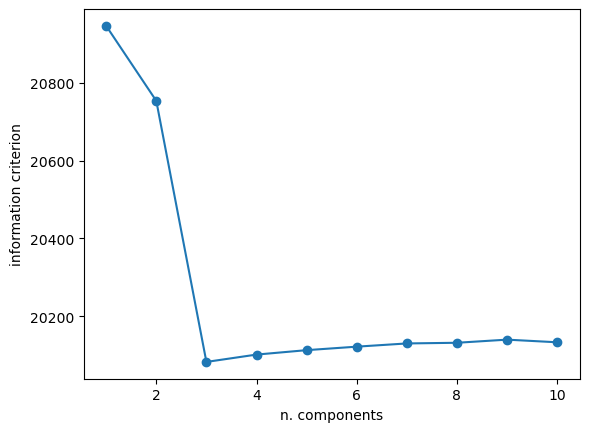

In [12]:

plt.plot(range(1,11), AIC,)
plt.scatter(range(1,11), AIC)

plt.xlabel('n. components')
plt.ylabel('information criterion');


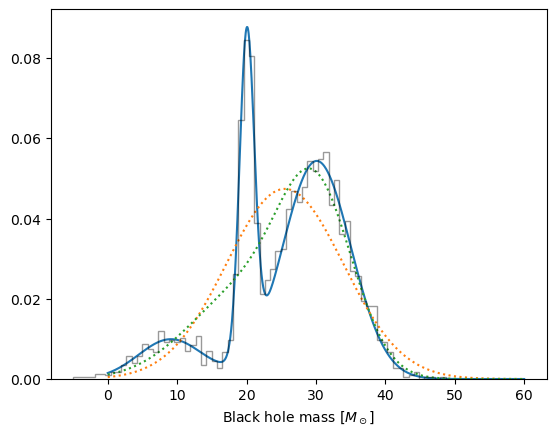

In [14]:

M = np.linspace(0,60,1000)

logprob = gauss_mixture_models[np.argmin(AIC)].score_samples(M.reshape(-1, 1))
pdf = np.exp(logprob)
plt.plot(M,pdf)

for i in range(np.argmin(AIC)):
    logprob = gauss_mixture_models[i].score_samples(M.reshape(-1, 1))
    pdf = np.exp(logprob)
    plt.plot(M,pdf,linestyle=':')    

plt.hist(data, 70, density=True, histtype='step', alpha=0.4,color='black')

#plt.plot(x, pdf, '--k')

plt.xlabel("Black hole mass $[M_\odot]$")

plt.show()

In [16]:
#responsibilities = M_best.predict_proba(x.reshape(-1, 1))
#pdf_individual = responsibilities * pdf[:, np.newaxis]

#plt.hist(X, 70, density=True, histtype='step', alpha=0.4,color='black')
#plt.plot(x, pdf_individual[:,0], c='C0')
#plt.plot(x, pdf_individual[:,1], c='C1')
#plt.plot(x, pdf_individual[:,2], c='C2')
#plt.plot(x, pdf, '--k')

#plt.xlabel("Black hole mass $[M_\odot]$")
